## Obligatory imports

In [168]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
import matplotlib
sns.set_style('whitegrid')
matplotlib.rcParams['figure.figsize'] = (10,8)
matplotlib.rcParams['font.size']=30
matplotlib.rcParams['lines.linewidth']=4

matplotlib.rcParams['xtick.major.size'] = 10
matplotlib.rcParams['ytick.major.size'] = 10
matplotlib.rcParams['xtick.major.width'] = 2
matplotlib.rcParams['ytick.major.width'] = 2

# MNIST Dataset

In [4]:
import IPython
url = 'http://yann.lecun.com/exdb/mnist/'
iframe = '<iframe src=' + url + ' width=80% height=400px></iframe>'
IPython.display.HTML(iframe)

## Fetch the data

In [8]:
from sklearn.datasets import fetch_mldata

In [9]:
mnist = fetch_mldata('MNIST original', data_home='data/')

In [10]:
allimages = mnist.data
allimages.shape

(70000, 784)

In [11]:
all_image_labels = mnist.target
set(all_image_labels)

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0}

## check out the data

In [12]:
digit1 = mnist.data[0,:].reshape(28,-1) # arr.reshape(4, -1) is equivalent to arr.reshape(4, 7), is arr has size 28

(-0.5, 27.5, 27.5, -0.5)

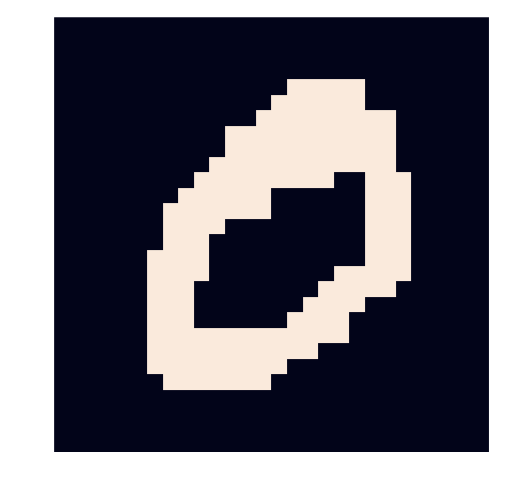

In [89]:
plt.imshow(digit1, vmin=0, vmax=1)
plt.axis('off')

## Classify using Logistic Regression

### Separate the data into training data and test data

In [14]:
len(allimages)

70000

### Sample the data, 70000 is too many images to handle on a single PC

In [15]:
len(allimages)

70000

In [16]:
size_desired_dataset = 2000

In [17]:
sample_idx = np.random.choice(len(allimages), size_desired_dataset)
images = allimages[sample_idx, :]
image_labels = all_image_labels[sample_idx]

In [18]:
set(image_labels)

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0}

In [19]:
image_labels.shape

(2000,)

### Partition into training and test set *randomly*

**As a rule of thumb, 80/20 split between training/test dataset is often recommended.**
See below for cross validation and how that changes this thumbrule.


In [20]:
ntraining = int(len(images)*0.8)

training_idxs = np.random.choice(len(images), ntraining)
test_idxs = np.array(list(set(range(len(images))) - set(training_idxs)))


training_data, training_labels = images[training_idxs, :], image_labels[training_idxs]
test_data, test_labels = images[test_idxs, :], image_labels[test_idxs]

### More useful way:

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
training_data, test_data, training_labels, test_labels = train_test_split(images, image_labels, train_size=0.5)

/home/dmanik/venvs/teaching/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [101]:
from sklearn.linear_model import LogisticRegression

In [102]:
lr = LogisticRegression()

In [103]:
training_labels.shape

(1000,)

In [104]:
lr.fit(training_data, training_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [105]:
lr.score(test_data, test_labels)

0.814

In [106]:
lr.predict(test_data[35].reshape(1,-1))

array([9.])

(-0.5, 27.5, 27.5, -0.5)

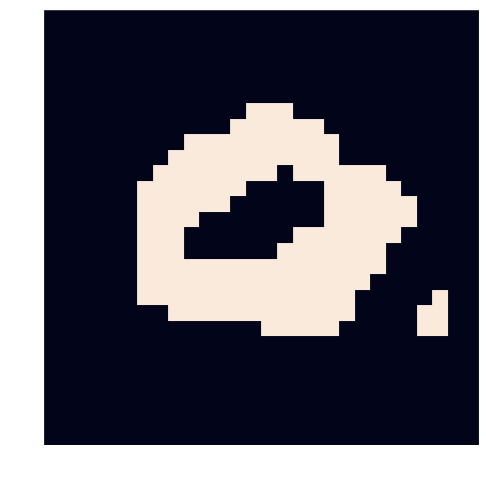

In [109]:
plt.imshow(test_data[35].reshape(28,-1), vmin=0, vmax=1)
plt.axis('off')

In [110]:
predicted_labels = lr.predict(test_data)

In [111]:
(predicted_labels != test_labels).sum()/len(test_labels)

0.186

### Show some sample outputs 

In [112]:
test_data.shape

(1000, 784)

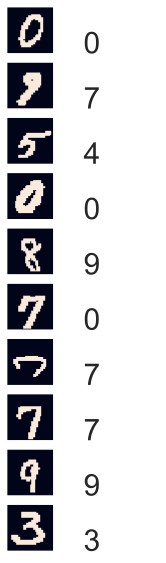

In [113]:
test_dataidxs = np.random.choice(len(test_data), 10)

fig, axes = plt.subplots(10,2, figsize=(3,10))
plt.axis('off')
sns.despine(left=True, bottom=True)
sns.set_style('whitegrid')
for i in range(10):
    idx = test_dataidxs[i]
    
    axes[i][0].imshow(test_data[idx].reshape(28,-1)[::-1,:], vmin=0, vmax=1, origin = 'upper')
    axes[i][1].text(0,0,int(lr.predict(test_data[idx,:].reshape(1,-1))), fontsize=30)
    axes[i][0].set_xlim(0,28)
    axes[i][0].set_ylim(0,28)
    axes[i][1].set_xlim(0,0.2)
    axes[i][1].set_ylim(0,0.2)
    
    axes[i][0].get_xaxis().set_visible(False)
    axes[i][0].get_yaxis().set_visible(False)
    axes[i][1].get_xaxis().set_visible(False)
    axes[i][1].get_yaxis().set_visible(False)


## Evaluating goodness of the classification

In [116]:
from sklearn.metrics import confusion_matrix

In [117]:
training_data, test_data, training_labels, test_labels = train_test_split(images, image_labels, train_size=0.1)
lr.fit(training_data, training_labels)

/home/dmanik/venvs/teaching/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [118]:
predicted_test_labels = lr.predict(test_data)

In [119]:
confmat = confusion_matrix(test_labels, predicted_test_labels, labels = range(10))
confmat

array([[163,   0,   2,   4,   0,   3,   2,   3,   5,   0],
       [  0, 187,   0,   0,   0,   0,   0,   0,   7,   0],
       [  2,  13, 124,   3,   4,   0,   2,   3,  21,   6],
       [  3,   3,   4, 169,   0,   5,   0,   4,  13,   4],
       [  1,   5,   0,   2, 102,   3,   2,   6,  10,  33],
       [  5,   3,   0,  46,   2,  91,   9,   3,  13,   8],
       [  5,  11,   1,   2,   3,   4, 141,   0,   1,   1],
       [  0,   2,   3,   1,   3,   1,   1, 132,   0,  31],
       [  8,   6,   1,  12,   0,   6,   3,   7, 126,   7],
       [  1,   0,   2,   6,   3,   0,   0,  29,   6, 131]])

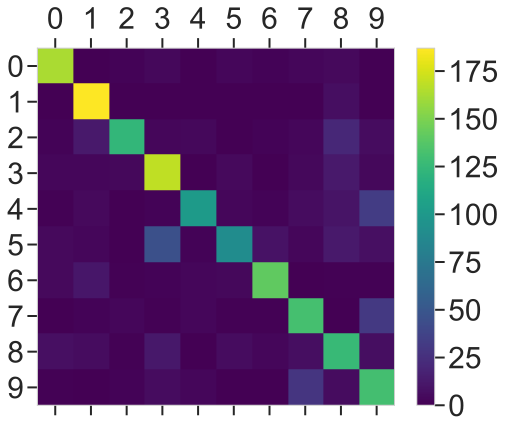

In [120]:
plt.matshow(confmat, cmap = 'viridis')
plt.colorbar(shrink = 0.8)
plt.grid('off')
_ = plt.xticks(range(10))
_ = plt.yticks(range(10))

## Under the hood: decision boundary


**Logistic regression draws a **planar decision boundary**
 in the `num_feature`-dimentional space (in the case of handwritten images, this is the number of pixels in each image).


![Image of Yaktocat](http://d3kbpzbmcynnmx.cloudfront.net/wp-content/uploads/2015/09/nn-from-scratch-lr-decision-boundary.png)

**A bit of math**

Given $n$ features, and $m$ independent data rows,
$$
\underbrace{\min}_{C_1,C_2,\cdots,C_n}  \sum_{j=1}^m \left(y^{\text{pred}}_j - y^{\text{actual}}_j\right)^2 \\
\text{Where decision boundary}  = C_1x_1 + C_2x_2 + \cdots + C_nx_n 
$$


**Therefore, it is evident that if the number of features is too low, the decision boundary won't be able to partition the data correctly. **
![](http://openclassroom.stanford.edu/MainFolder/courses/MachineLearning/exercises/ex8materials/ex8b_100.png)

**Two solutions**
* Increase number of features, since this will draw the decision boundary in a higher dimension, and hopefully resulting in finer grained partition. (This runs the risk of *overfitting*, discussed below ).
* Use methods other than Logistic regression, that are capable of **non-planar** i.e. curved decision boundaries.

## Overfitting
![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/Overfitting.svg/400px-Overfitting.svg.png)

Schematic diagram, of course for Logistic regression, decision boundary cannot be non-planar.

## How to detect overfitting: Cross validation and learning curve

In [121]:
train_sizes = np.linspace(0.05, 0.99, 10)

train_scores = []
test_scores = []

for ntraining in train_sizes:
    training_data, test_data, training_labels, test_labels = train_test_split(images, image_labels, train_size=ntraining)
    
    lr.fit(training_data, training_labels)
    
    train_scores.append(lr.score(training_data, training_labels))
    test_scores.append(lr.score(test_data, test_labels))

/home/dmanik/venvs/teaching/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


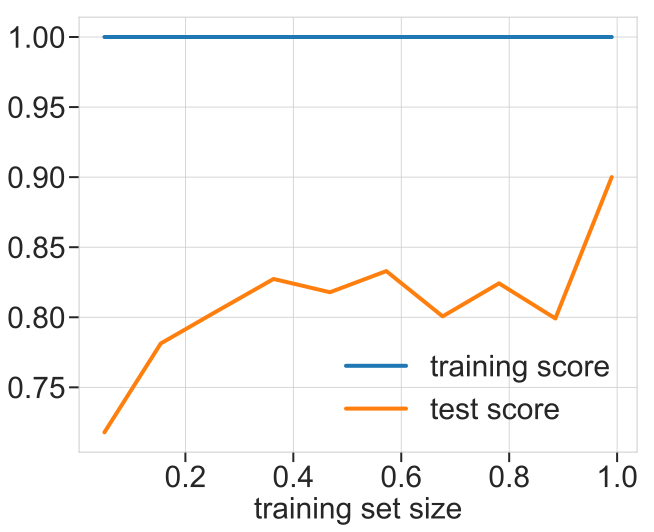

In [122]:
plt.plot(train_sizes, train_scores, label = 'training score')
plt.plot(train_sizes, test_scores, label = 'test score')
plt.xlabel('training set size')
plt.legend() 

##  Cross-validation is built into scipy

In [123]:
import pandas as pd

In [124]:
from sklearn.model_selection import learning_curve

In [125]:
curve = learning_curve(lr, images, image_labels, train_sizes= np.linspace(0.05, 0.99, 10), cv = 18, n_jobs = 12)

In [126]:
train_sizes, train_scores, test_scores = curve

In [127]:
train_scores = pd.DataFrame(train_scores)
train_scores.loc[:,'train_size'] = train_sizes
test_scores = pd.DataFrame(test_scores)
test_scores.loc[:,'train_size'] = train_sizes

In [128]:
train_scores.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,train_size
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,94
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,291
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,488
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,684
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,881


In [129]:
train_scores = pd.melt(train_scores, id_vars=['train_size'], value_name = 'CrossVal score')
test_scores = pd.melt(test_scores, id_vars=['train_size'], value_name = 'CrossVal score')

In [130]:
train_scores.head()

,train_size,variable,CrossVal score
0,94,0,1.0
1,291,0,1.0
2,488,0,1.0
3,684,0,1.0
4,881,0,1.0


/home/dmanik/venvs/teaching/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


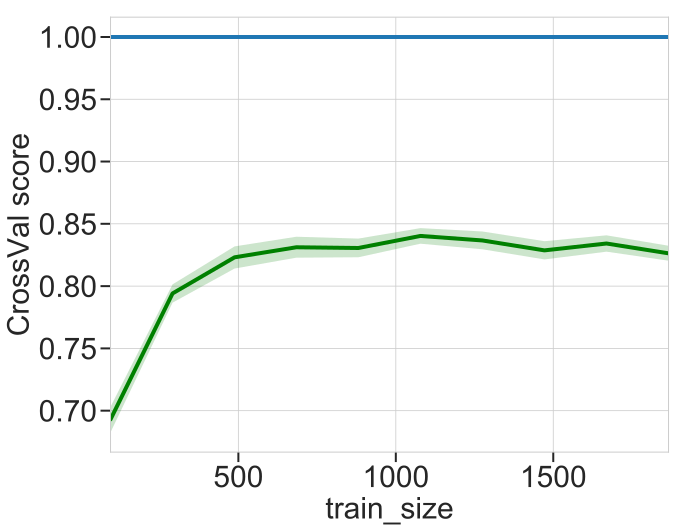

In [133]:
sns.tsplot(train_scores, time = 'train_size', unit='variable', value = 'CrossVal score')
sns.tsplot(test_scores, time = 'train_size', unit='variable', value = 'CrossVal score', color='g')

## Rules of thumb:
* **Training score low, test score low**: You are underfitting.
    - Increase number of features (e.g. higher resolution images).
    - Getting more training data is useless.
* **Training score high, but test score low**: You are overfitting.
    - Reduce number of features. 
    - Increase test set size.
    - Increase Regularization (Discussed below).

# Iris dataset

In [134]:
df  = sns.load_dataset('iris')

In [135]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [136]:
features = np.array(df.loc[:,['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
labels = df.loc[:, 'species']

In [137]:
training_data, test_data, training_labels, test_labels = train_test_split(features, labels, train_size=0.5)

/home/dmanik/venvs/teaching/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [138]:
lr.fit(training_data, training_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [139]:
lr.score(test_data, test_labels)

0.9866666666666667

In [141]:
curve = learning_curve(lr, features, labels, train_sizes= np.linspace(40,99,10).astype(int), n_jobs = 12)
train_sizes, train_scores, test_scores = curve

train_scores = pd.DataFrame(train_scores)
train_scores.loc[:,'train_size'] = train_sizes
test_scores = pd.DataFrame(test_scores)
test_scores.loc[:,'train_size'] = train_sizes

train_scores.head()

,0,1,2,train_size
0,1.0,1.0,1.0,40
1,1.0,1.0,1.0,46
2,1.0,1.0,1.0,53
3,1.0,1.0,1.0,59
4,1.0,1.0,1.0,66


In [142]:
train_scores = pd.melt(train_scores, id_vars=['train_size'], value_name = 'CrossVal score')
test_scores = pd.melt(test_scores, id_vars=['train_size'], value_name = 'CrossVal score')

In [143]:
train_scores.head()

,train_size,variable,CrossVal score
0,40,0,1.0
1,46,0,1.0
2,53,0,1.0
3,59,0,1.0
4,66,0,1.0


/home/dmanik/venvs/teaching/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.


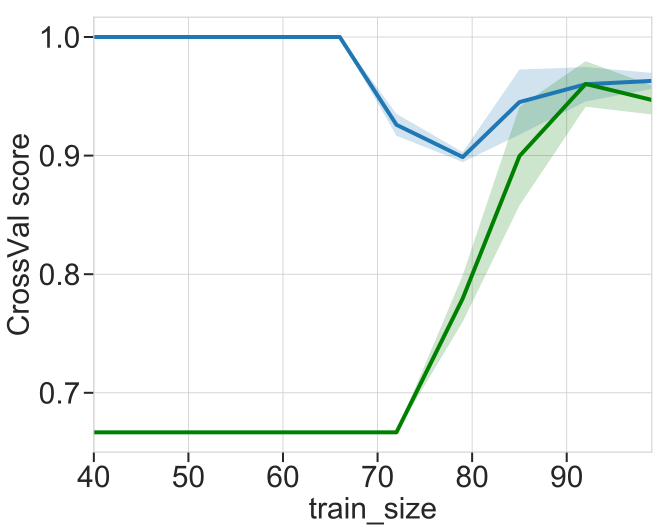

In [146]:
sns.tsplot(train_scores, time = 'train_size', unit='variable', value = 'CrossVal score')
sns.tsplot(test_scores, time = 'train_size', unit='variable', value = 'CrossVal score', color='g')
plt.legend()

## Feature engineering

In [147]:
features = np.array(df.loc[:,['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
labels = df.loc[:, 'species']

### Add more columns out of existing columns

In [148]:
num_cols = 4

for i in range(num_cols):
    for j in range(num_cols):
        features = np.hstack((features,(features[:,i]*features[:,j]).reshape(-1,1)))

In [149]:
training_data, test_data, training_labels, test_labels = train_test_split(features, labels, train_size=0.5)

lr.fit(training_data, training_labels)

/home/dmanik/venvs/teaching/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [150]:
lr.score(test_data, test_labels)

0.96

In [151]:
curve = learning_curve(lr, features, labels, train_sizes= np.linspace(40,99,10).astype(int), n_jobs = 12)
train_sizes, train_scores, test_scores = curve

In [152]:
train_scores = pd.DataFrame(train_scores)
train_scores.loc[:,'train_size'] = train_sizes
test_scores = pd.DataFrame(test_scores)
test_scores.loc[:,'train_size'] = train_sizes

In [153]:
train_scores.head()

,0,1,2,train_size
0,1.0,1.0,1.0,40
1,1.0,1.0,1.0,46
2,1.0,1.0,1.0,53
3,1.0,1.0,1.0,59
4,1.0,1.0,1.0,66


In [154]:
train_scores = pd.melt(train_scores, id_vars=['train_size'], value_name = 'CrossVal score')
test_scores = pd.melt(test_scores, id_vars=['train_size'], value_name = 'CrossVal score')

/home/dmanik/venvs/teaching/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.


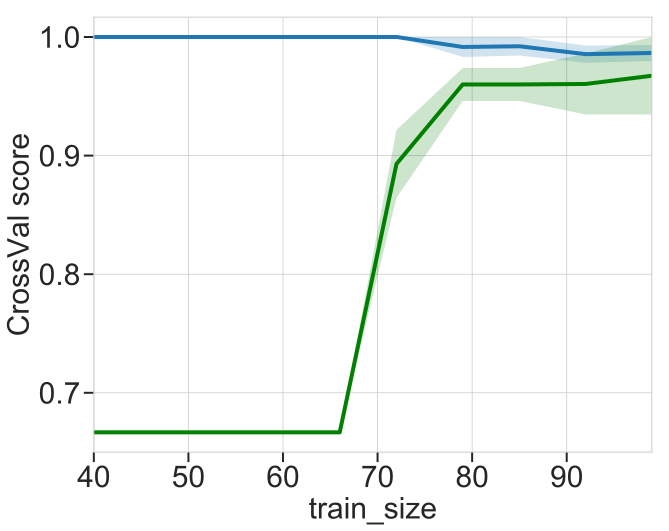

In [157]:
sns.tsplot(train_scores, time = 'train_size', unit='variable', value = 'CrossVal score')
sns.tsplot(test_scores, time = 'train_size', unit='variable', value = 'CrossVal score', color='g')
plt.legend()

### Why not go further: Overfitting

In [158]:
features = np.array(df.loc[:,['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
labels = df.loc[:, 'species']

In [159]:
num_cols = 4

for i in range(num_cols):
    for j in range(num_cols):
        features = np.hstack((features,(features[:,i]*features[:,j]).reshape(-1,1)))

for i in range(num_cols):
    for j in range(num_cols):
        for k in range(num_cols):
            features = np.hstack((features,(features[:,i]*features[:,j]*features[:,k]).reshape(-1,1)))
            
            
for i in range(num_cols):
    for j in range(num_cols):
        for k in range(num_cols):
            for l in range(num_cols):
                features = np.hstack((features,(features[:,i]*features[:,j]*features[:,k]*features[:,l]).reshape(-1,1)))
                
                
for i in range(num_cols):
    for j in range(num_cols):
        for k in range(num_cols):
            for l in range(num_cols):
                for m in range(num_cols):
                    features = np.hstack((features,(features[:,i]*features[:,j]*features[:,k]*features[:,l]*features[:,m]).reshape(-1,1)))
                    
for i in range(num_cols):
    for j in range(num_cols):
        for k in range(num_cols):
            for l in range(num_cols):
                for m in range(num_cols):
                    for n in range(num_cols):
                        features = np.hstack((features,(features[:,i]*features[:,j]*features[:,k]*features[:,l]*features[:,m]*features[:,n]).reshape(-1,1)))

In [160]:
features.shape

(150, 5460)

In [161]:
training_data, test_data, training_labels, test_labels = train_test_split(features, labels, train_size=0.5)

/home/dmanik/venvs/teaching/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [162]:
lr.fit(training_data, training_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [163]:
lr.score(test_data, test_labels)

0.9466666666666667

In [164]:
curve = learning_curve(lr, features, labels, train_sizes= np.linspace(40,99,10).astype(int), n_jobs = 12)
train_sizes, train_scores, test_scores = curve

In [165]:
train_scores = pd.DataFrame(train_scores)
train_scores.loc[:,'train_size'] = train_sizes
test_scores = pd.DataFrame(test_scores)
test_scores.loc[:,'train_size'] = train_sizes

In [166]:
train_scores = pd.melt(train_scores, id_vars=['train_size'], value_name = 'CrossVal score')
test_scores = pd.melt(test_scores, id_vars=['train_size'], value_name = 'CrossVal score')

/home/dmanik/venvs/teaching/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.


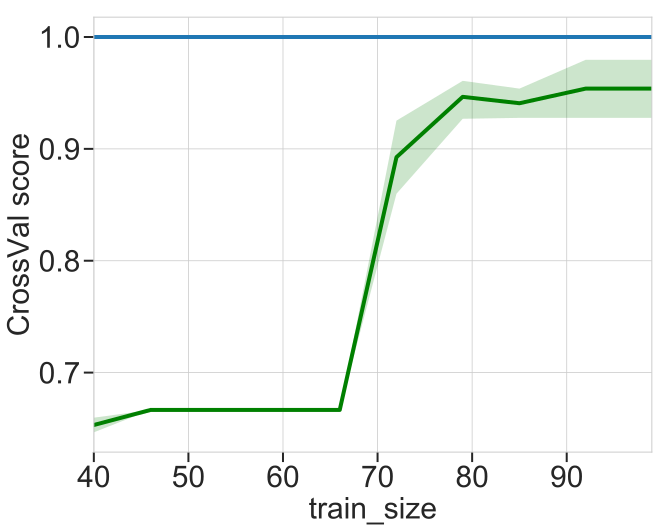

In [169]:
sns.tsplot(train_scores, time = 'train_size', unit='variable', value = 'CrossVal score')
sns.tsplot(test_scores, time = 'train_size', unit='variable', value = 'CrossVal score', color='g')
plt.legend()

## Regularization
**The goal:** Avoid overfitting

**Approach:** Penalize *complexity* of the model e.g. "non-smoothness" of the function.
  - Ex: During Logistic regression fit, add a term $\sum_j C_j^2$ to the cost function:
Given $n$ features, and $m$ independent data rows,
$$
\underbrace{\min}_{C_1,C_2,\cdots,C_n}  \sum_{j=1}^m \left(y^{\text{pred}}_j - y^{\text{actual}}_j\right)^2 + \lambda\sum_{i=1}^n C_i^2\\
\text{Where decision boundary}  = C_1x_1 + C_2x_2 + \cdots + C_nx_n 
$$
  
  
  
```python
lr = LogisticRegression(C=0.8) # the regularization parameter
```


## Separating cross validation data from test data
We use cross validation to see
  * If the features are indeed the right features for classifying.
  * If yes, then still we normally need to train the LR classifier with certain parameters (e.g. C the regularization parameter).
  * We can use the learning curve to tune our LR classifier, i.e. choose a regularization parameter. Recall, a good clasifier has
    - Both training and test score increases and reached a  quite high stable value when training set size is increased.  
    - The difference between training scotre and test score is low at that point.

Now, the moment we make a decision (i.e. choosing the regularization parameter), we should test against *another* independent dataset if the classifier still performs as it did for the cross validation set. 

That's why, a  **60/20/20** split between **training/CV/test** dataset is often recommended. 

# Exercise
1. Download the [student performance dataset](http://archive.ics.uci.edu/ml/datasets/student+performance). 
2. Split the data into training set and test set using `train_test_split`.
3. Fit a logistic regression classifier and check the score.
4. Plot the confusion matrix. 
5. Using different training data size, plot the learning curve. 

## Further reading
* http://www.ritchieng.com/applying-machine-learning/
    